In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Correct the code below

dataset_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())  # Corrected the function call: printdf.head() should be print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())  # Corrected: removed the space between df. and info()

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())  # Corrected: removed the extra space in df. isnull(). sum()

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values in Dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species   

In [5]:
# Select relevant columns (e.g., Sepal Length, Sepal Width, Petal Length)
# For illustration, we assume columns ['sepal_length', 'sepal_width', 'petal_length'] are used for clustering
features = df[['sepal_length', 'sepal_width', 'petal_length']]

# Standardize the data
scaler = StandardScaler()  # Corrected: Added parentheses to instantiate the StandardScaler object

scaled_features = scaler.fit_transform(features)

# Display the first few rows of the standardized data
print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])  # Corrected: Fixed spacing


First 5 rows of scaled features:
[[-0.90068117  1.01900435 -1.34022653]
 [-1.14301691 -0.13197948 -1.34022653]
 [-1.38535265  0.32841405 -1.39706395]
 [-1.50652052  0.09821729 -1.2833891 ]
 [-1.02184904  1.24920112 -1.34022653]]


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

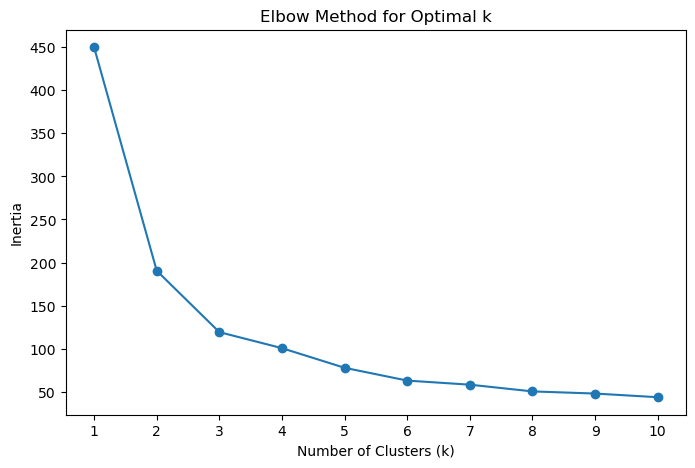

In [7]:
# Elbow Method to find the optimal number of clusters

inertia = []  # Initialize inertia as an empty list to store inertia values
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Fixed the variable name and indentation
    inertia.append(kmeans.inertia_)  # Append the inertia value to the list

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')  # Corrected the marker symbol
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [9]:
# Perform K-Means clustering with the optimal k (from the elbow method, assume k=3 here)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)  # Fixed variable name and method call

# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels  # Fixed spacing around the equal sign

# Display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels:")
print(df.head())  # Corrected the function call: printdf.head() to print(df.head())


First 5 rows with cluster labels:
   sepal_length  sepal_width  petal_length  petal_width species  Cluster
0           5.1          3.5           1.4          0.2  setosa        2
1           4.9          3.0           1.4          0.2  setosa        2
2           4.7          3.2           1.3          0.2  setosa        2
3           4.6          3.1           1.5          0.2  setosa        2
4           5.0          3.6           1.4          0.2  setosa        2


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


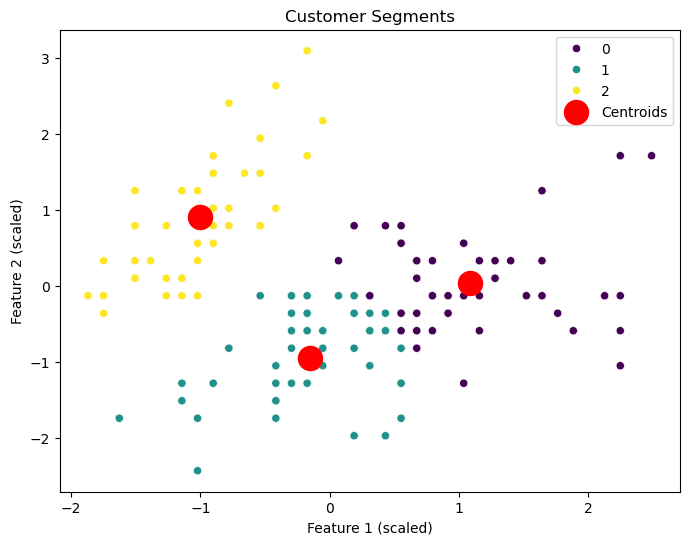

In [11]:
# Visualize clusters (using the first two features for plotting)
plt.figure(figsize=(8, 6))

# Scatter plot with the first two features
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=cluster_labels, palette='viridis')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

# Set plot titles and labels
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

# Show legend and plot
plt.legend()
plt.show()